In [3]:
# to embed videos inside the notebook, install the mediapy first
!pip install mediapy

# Functional API

In [46]:
%load_ext autoreload
%autoreload 2

import functional as NF
import augmentation as  NA 
import dataset as ND
import plot as NP

import mediapy as media
import matplotlib
import matplotlib.pyplot as plt
import mediapy as media

import torch.nn as nn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


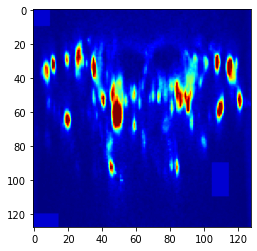

In [38]:
dff = NF.read_dff('/data/MM/data/201014_G23xU1_Fly1_005')
dff = NF.normalize_video(dff)
plt.imshow(dff[0], cmap='jet')

In [11]:
dff_rgb = media.to_rgb(dff, cmap=matplotlib.cm.get_cmap('jet'))
media.show_video(dff_rgb[100:150], fps=10, height=150)

In [24]:
# raw 2d data and preprocess
pr = NF.read_pose_result_mm('/data/MM/data/201014_G23xU1_Fly1_005')
pr = pr + 0 # make it writable
pr = NA.PRunNorm()(pr.reshape(-1, 38, 2)) # preprocess
pr = pr.cpu().data.numpy().reshape(-1, 38, 2) # convert to numpy to visualize
media.show_video(NP.plot_pts2d_video(pr[:100]), height=200)

# Pytorch API

In [54]:
dat = ND.DatasetUM(
    path_list=['/data/MM/data/201008_G23xU1_Fly1_001'],
    n_frames=32,
    modal='dff',
    stride=1
)

dff, meta = dat[0]

In [106]:
# load synchronized multiple modalities 
dat = ND.DatasetMM(
    path_list=['/data/MM/data/201008_G23xU1_Fly1_001'],
    modal1='dff',
    modal2='pr',
    n_frames1=32,
    n_frames2=8,
    aug1=nn.Identity(),
    aug2=nn.Identity(),
    stride=1,
)
((dff, _), (pr, _)) = dat[0]